In [ ]:


import main
from astropy.constants import G, M_sun, c
from jax import config
from jax.experimental.ode import odeint
from main import calculate_force
from old_config import file_path
from zmq.utils.buffers import viewfromobject_r

import utils
from testing import vp_actual, sphinputs
from utils import get_np_vecs

config.update('jax_enable_x64', True)

In [ ]:
# ((24 * np.pi**2 * X[:,2]**2 ) / (c.value**2 * X[:,3]**3 * (1-X[:,1]**2))) * 180 * 3600 * (3600 * 24* 365.25) * X[:,0]

In [ ]:
# parameters, covariance = curve_fit(quadplusperiodic, X[:,0], y[:,0])
# print(f'w: {parameters[1]} as/yr, Q: {parameters[2]} as/yr^2')

In [ ]:
# const = 24 * 180 * 3600 * 3600 * 24 * 365.25
# const

# MODEL

In [ ]:
from models import *
import glob
from lightning.pytorch import Trainer
import config

In [ ]:
reload(config)
reload(utils)
reload(models)

In [ ]:
config.register('gnn')

In [ ]:
import joblib

In [ ]:
scaler = np.log10
joblib.dump(scaler, 'test.pkl')

In [ ]:
scal = joblib.load('test.pkl')
scal.__doc__

In [ ]:
reload(utils)

In [ ]:
scaler = utils.ScalerTransform(np.log10, lambda x: 10 ** x)
scaler(1394568534.56)

In [ ]:
data_module = utils.NNDataModule()
model = GNN

In [ ]:
config.retrieve('model')(lr=2)

In [ ]:
ckpt = glob.glob('*.ckpt')
ckpt

In [ ]:
model = InterpMLP.load_from_checkpoint(ckpt[0])
data_module = NNDataModule()

In [ ]:
trainer = Trainer(
    accelerator='mps',
    devices='auto',
    benchmark=True,
)
trainer.test(model=model, datamodule=data_module)

In [ ]:
import os
os.path.getctime(ckpt[0])
max(ckpt, key=os.path.getctime)

In [ ]:
np.array([1, 2]).shape

In [ ]:

import jax.numpy as jnp
from jax import config as jax_config

jax_config.update('jax_enable_x64', True)

In [ ]:
from importlib import reload
import utils
reload(utils)

In [ ]:
from models import GNN
ckpt = 'hopt/checkpoints/gnn_adamw_533.ckpt'
model = GNN.load_from_checkpoint(ckpt)

X, y = utils.analysis.gnn_test(model, ntrials=10000, suppress=True, SR=True)
X

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def custom_loss(output, target, margin, lambda_):
    distance = np.abs(output - target)
    within_margin = distance <= margin
    loss = np.zeros_like(output)

    # Loss within margin
    loss[within_margin] = (output[within_margin] - target) ** 2

    # Loss outside margin
    loss[~within_margin] = lambda_ * (distance[~within_margin] - margin) ** 2

    return loss

def mse_loss(output, target):
    return (output - target) ** 2

def l1_loss(output, target):
    return np.abs(output - target)

# Target value
target_value = 0.42

# Range of output values from -1 to 1
outputs = np.linspace(-1, 1, 500)

# Margin and lambda for custom loss
margin = 0.3  # Adjust as needed
lambda_ = 0.5  # Scaling factor for loss outside the margin

# Compute custom loss
custom_losses = custom_loss(outputs, target_value, margin, lambda_)

# Compute MSE Loss
mse_losses = mse_loss(outputs, target_value)

# Compute L1 Loss
l1_losses = l1_loss(outputs, target_value)

# Plotting
plt.figure(figsize=(12, 8))

# Plot Custom Loss
plt.plot(outputs, custom_losses, label='Custom Loss', color='red')

# Plot MSE Loss
plt.plot(outputs, mse_losses, label='MSE Loss', linestyle='--', color='blue')

# Plot L1 Loss
plt.plot(outputs, l1_losses, label='L1 Loss', linestyle='-.', color='green')

# Add vertical line at target value
plt.axvline(x=target_value, color='gray', linestyle=':', label='Target Value')

# Indicate margin boundaries
plt.axvline(x=target_value - margin, color='purple', linestyle=':', label='Margin Bounds')
plt.axvline(x=target_value + margin, color='purple', linestyle=':')

# Labels and Title
plt.xlabel('Output Value')
plt.ylabel('Loss')
plt.title('Comparison of Loss Functions')

# Legend
plt.legend()

# Grid
plt.grid(True)

# Show Plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Exponential Loss Function
def exponential_loss(output, target, k):
    return np.exp(k * np.abs(output - target)) - 1

# High-Order Polynomial Loss Function
def high_order_loss(output, target, n):
    return np.abs(output - target) ** n

# Inverse Quadratic Loss Function
def inverse_quadratic_loss(output, target, epsilon=1e-6):
    return 1 / ((output - target) ** 2 + epsilon)

# Logistic Loss Function
def logistic_loss(output, target, k, m):
    return 1 / (1 + np.exp(-k * (m - np.abs(output - target))))

# Zero-One Approximation Loss Function
def zero_one_approx_loss(output, target, sigma):
    return 1 - np.exp(-((output - target) ** 2) / (2 * sigma ** 2))

# Target value
target_value = 0.42

# Range of output values near the target value
outputs = np.linspace(target_value - 1, target_value + 1, 500)

# Parameters for loss functions
k = 50          # Sharpness parameter for exponential and logistic loss
n = 4           # Exponent for high-order loss
epsilon = 1e-6  # Small constant for inverse quadratic loss to prevent division by zero
sigma = .25     # Width parameter for zero-one approximation loss
m = 0.0         # Threshold parameter for logistic loss

# Compute loss values
exp_losses = exponential_loss(outputs, target_value, k)
high_order_losses = high_order_loss(outputs, target_value, n)
inv_quad_losses = inverse_quadratic_loss(outputs, target_value, epsilon)
logistic_losses = logistic_loss(outputs, target_value, k, m)
zero_one_losses = zero_one_approx_loss(outputs, target_value, sigma)

# Plotting
plt.figure(figsize=(12, 8))

# plt.plot(outputs, exp_losses, label='Exponential Loss', color='red')
# plt.plot(outputs, high_order_losses, label=f'High-Order Loss (n={n})', color='blue')
# plt.plot(outputs, inv_quad_losses, label='Inverse Quadratic Loss', color='green')
# plt.plot(outputs, logistic_losses, label='Logistic Loss', color='purple')
plt.plot(outputs, zero_one_losses, label='Zero-One Approximation Loss', color='orange')

# Labels and Title
plt.xlabel('Output Value')
plt.ylabel('Loss')
plt.title('Comparison of Sharp Penalty Loss Functions')

# Add vertical line at target value
plt.axvline(x=target_value, color='gray', linestyle=':', label='Target Value')

# Legend
plt.legend()

# Grid
plt.grid(True)

# Show Plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X[:, 0], y)

# STUDIES

In [122]:
import glob
import optuna
from utils import *
from importlib import reload
import optuna.visualization as vis
import utils
studies = glob.glob('*study*')
studies

['gnn_nadam_study.db']

In [123]:
db = studies[0]
study_name = db[:-3]
storage_name = f"sqlite:///{db}"
study_name, storage_name

('gnn_nadam_study', 'sqlite:///gnn_nadam_study.db')

In [124]:
reload(utils.optuna_helpers)

<module 'utils.optuna_helpers' from '/Users/blu3/PycharmProjects/orbit_ml/utils/optuna_helpers.py'>

In [130]:
plotly.io.templates.default = 'simple_white'
study = optuna.load_study(study_name=study_name, storage=storage_name)
fig = vis.plot_param_importances(study)
fig.show()

In [126]:
print_best_optuna(db, pareto=False)


Study name: gnn_nadam_study
Best trial value: 4.1234702036967674e-05
Best trial parameters:
  num_layers: 5
  lr: 0.00045830946730129885
  hidden_dim: 2048
  drop_rate: 0.14152253394728245
  dropout_frequency: 3
  se_reduction: 64
  activation: relu
  loss_name: l1
  scheduler_factor: 0.06603369129970485
  patience: 4
  betas1: 0.9105880024486549
  betas2: 0.9915574031641383
  weight_decay: 3.7148597273862825e-09
  momentum_decay: 0.03288402439883893


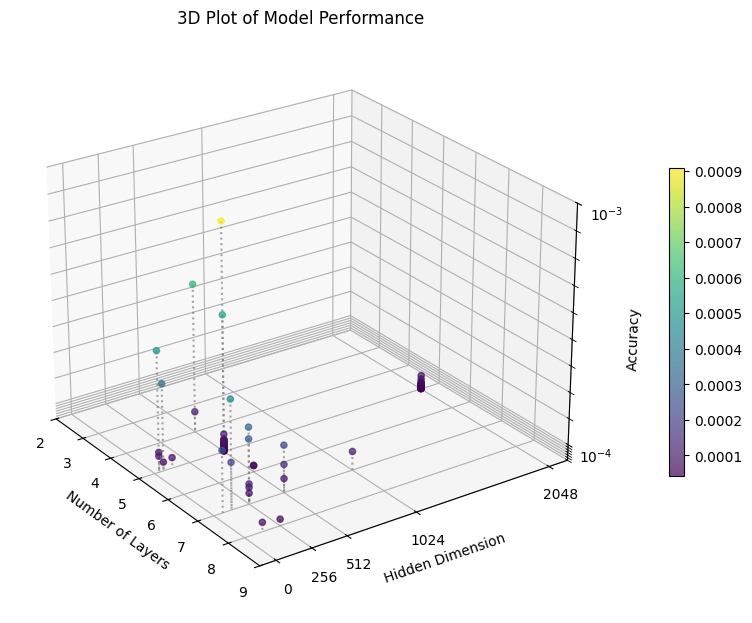

In [159]:
import numpy as np
import matplotlib.pyplot as plt

# Suppose df is your DataFrame already loaded with your study results.
# And assume that lower 'value' indicates better performance (e.g. error) or
# if it's accuracy (higher is better), adjust the plotting labels accordingly.

#range
val_range = (float(4e-5), float(1e-3))

#study
df = study.trials_dataframe()
df = df[df['value']<=val_range[1]][['value', 'params_num_layers', 'params_hidden_dim']].sort_values(by='value').copy()

# 3D Scatter for both metrics
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = np.array(df['params_num_layers'])
y = np.array(df['params_hidden_dim'])
z = np.array(df['value'])

sc = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o', alpha=0.7)

# Draw drop lines for each point:
for xi, yi, zi in zip(x, y, z):
    ax.plot([xi, xi], [yi, yi], [zi, val_range[0]], linestyle=':', color='gray', alpha=0.7)

# x axis, n_layers
ax.set_xlabel('Number of Layers')
ax.set_xticks(np.arange(2, 10, 1))

# y axis, hidden dims
ax.set_ylabel('Hidden Dimension')
ax.set_yticks([0, 256, 512, 1024, 2048])

ax.set_zlabel('Accuracy')
ax.set_zlim(val_range)
ax.set_zscale('log')
ax.set_title('3D Plot of Model Performance')
ax.view_init(elev=25, azim=-35)
fig.colorbar(sc, ax=ax, pad=0.1, shrink=0.5)
plt.show()


In [ ]:
print_best_optuna(study, single_pareto=0)
#plot_pareto(study, single=0)
plot_pareto(study, vals=[0,2], full=True)

In [ ]:
utils.optuna_helpers.print_best_optuna(studies[0], single_pareto=0)

# MAKING INTERP DATA

In [2]:
from utils import *
import matplotlib.pyplot as plt
import numpy as np

### MAKING SPHINPUTS/OBS_DATA

In [3]:
reload = True
inputs = load_np('inputs.npy', 'horizons.csv', reload=reload)
earth_pos = load_np('earth_pos.npy', 'earth_pos.csv', reload=reload)

In [4]:
t = inputs[:, 0]
ts = t * 365.25 * 24 * 3600
dt = np.median(np.diff(ts))
dt

720.4931182861328

In [13]:
x, y, z = mean_L_vector(og_x, og_v)
ra = np.arctan2(y, x) * 180 / np.pi + 360
dec = np.arctan2(z, np.sqrt(x**2 + y**2)) * 180 / np.pi
ra, dec

(281.03050918282406, 61.45410488554413)

In [5]:
og_x = inputs[:, 1:4]
og_v = inputs[:, 4:]
rx, rv = flat_plane(og_x, og_v)

In [5]:
full_cart = get_movements(np.column_stack([ts, rx, rv]))
full_cart

array([[ 5.83909841e+10,  3.52321080e+10,  3.19495428e+10, ...,
        -4.34302535e-02, -3.93838509e-02,  3.23118487e-06],
       [ 5.83909848e+10,  3.52013459e+10,  3.19770894e+10, ...,
        -4.34039930e-02, -3.94283990e-02,  3.23103901e-06],
       [ 5.83909855e+10,  3.51705613e+10,  3.20046155e+10, ...,
        -4.33776950e-02, -3.94729499e-02,  3.23089126e-06],
       ...,
       [ 5.96532859e+10,  3.00808842e+09,  4.59777004e+10, ...,
        -4.07829289e-03, -6.23357200e-02, -1.85569254e-06],
       [ 5.96532866e+10,  2.96584840e+09,  4.59814420e+10, ...,
        -4.02076388e-03, -6.23367503e-02, -1.85282434e-06],
       [ 5.96532873e+10,  2.92360629e+09,  4.59851512e+10, ...,
        -3.96323692e-03, -6.23376970e-02, -1.84995401e-06]])

In [11]:
sph = cart_to_sph(rx)
r, theta, phi = sph.T

(1753200,)


In [12]:
r_unit = rx/r.reshape(-1, 1)
theta_unit = np.column_stack([np.cos(theta)*np.cos(phi), np.cos(theta)*np.sin(phi), -np.sin(theta)])
phi_unit = np.column_stack([-np.sin(phi), np.cos(phi), np.zeros_like(phi)])

In [15]:
v_r = np.einsum('ij,ij->i', rv, r_unit)
v_theta = np.einsum('ij,ij->i', rv, theta_unit)
v_phi = np.einsum('ij,ij->i', rv, phi_unit)

In [19]:
a_full = full_cart[:, -3:]
a_r = np.einsum('ij,ij->i', a_full, r_unit)
a_theta = np.einsum('ij,ij->i', a_full, theta_unit)
a_phi = np.einsum('ij,ij->i', a_full, phi_unit)

In [28]:
sphinputs = np.column_stack([ts, r, theta, phi, v_r, v_theta, v_phi, a_r, a_theta, a_phi])
sphinputs

array([[ 5.83909841e+10,  4.75612734e+10,  1.57085148e+00, ...,
        -5.86282751e-02,  2.10771578e-09,  1.37462570e-08],
       [ 5.83909848e+10,  4.75570080e+10,  1.57085146e+00, ...,
        -5.86387693e-02,  2.11411213e-09,  1.37183261e-08],
       [ 5.83909855e+10,  4.75527476e+10,  1.57085145e+00, ...,
        -5.86492814e-02,  2.12058385e-09,  1.36741566e-08],
       ...,
       [ 5.96532859e+10,  4.60759974e+10,  1.57076675e+00, ...,
        -6.24689880e-02,  7.77071112e-09, -1.79796743e-08],
       [ 5.96532866e+10,  4.60769928e+10,  1.57076679e+00, ...,
        -6.24662868e-02,  7.77001646e-09, -1.80180136e-08],
       [ 5.96532873e+10,  4.60779948e+10,  1.57076683e+00, ...,
        -6.24635551e-02,  7.76930765e-09, -1.81021954e-08]])

In [37]:
np.save('sphinputs.npy', sphinputs)
sphinputs

array([[ 5.83909841e+10,  4.75612734e+10,  1.57085148e+00, ...,
        -5.86282751e-02,  2.10771578e-09,  1.37462570e-08],
       [ 5.83909848e+10,  4.75570080e+10,  1.57085146e+00, ...,
        -5.86387693e-02,  2.11411213e-09,  1.37183261e-08],
       [ 5.83909855e+10,  4.75527476e+10,  1.57085145e+00, ...,
        -5.86492814e-02,  2.12058385e-09,  1.36741566e-08],
       ...,
       [ 5.96532859e+10,  4.60759974e+10,  1.57076675e+00, ...,
        -6.24689880e-02,  7.77071112e-09, -1.79796743e-08],
       [ 5.96532866e+10,  4.60769928e+10,  1.57076679e+00, ...,
        -6.24662868e-02,  7.77001646e-09, -1.80180136e-08],
       [ 5.96532873e+10,  4.60779948e+10,  1.57076683e+00, ...,
        -6.24635551e-02,  7.76930765e-09, -1.81021954e-08]])

In [40]:
obs_data = np.column_stack((ts, og_x, earth_pos[:, 1:]))
np.save('obs_data.npy', obs_data)
obs_data

array([[ 5.83909841e+10,  3.58044721e+10,  2.90133329e+10, ...,
        -1.28028870e+11, -7.23750078e+10, -3.14114963e+10],
       [ 5.83909848e+10,  3.57744759e+10,  2.90369507e+10, ...,
        -1.28017961e+11, -7.23918227e+10, -3.14187937e+10],
       [ 5.83909855e+10,  3.57444567e+10,  2.90605499e+10, ...,
        -1.28007049e+11, -7.24086362e+10, -3.14260906e+10],
       ...,
       [ 5.96532859e+10,  4.04447894e+09,  4.06610497e+10, ...,
        -1.28390378e+11, -7.18171244e+10, -3.11606480e+10],
       [ 5.96532866e+10,  4.00251213e+09,  4.06633897e+10, ...,
        -1.28379556e+11, -7.18340009e+10, -3.11679701e+10],
       [ 5.96532873e+10,  3.96054251e+09,  4.06657011e+10, ...,
        -1.28368732e+11, -7.18508760e+10, -3.11752916e+10]])

In [41]:
sphinputs = np.load('sphinputs.npy')
sphinputs

array([[ 5.83909841e+10,  4.75612734e+10,  1.57085148e+00, ...,
        -5.86282751e-02,  2.10771578e-09,  1.37462570e-08],
       [ 5.83909848e+10,  4.75570080e+10,  1.57085146e+00, ...,
        -5.86387693e-02,  2.11411213e-09,  1.37183261e-08],
       [ 5.83909855e+10,  4.75527476e+10,  1.57085145e+00, ...,
        -5.86492814e-02,  2.12058385e-09,  1.36741566e-08],
       ...,
       [ 5.96532859e+10,  4.60759974e+10,  1.57076675e+00, ...,
        -6.24689880e-02,  7.77071112e-09, -1.79796743e-08],
       [ 5.96532866e+10,  4.60769928e+10,  1.57076679e+00, ...,
        -6.24662868e-02,  7.77001646e-09, -1.80180136e-08],
       [ 5.96532873e+10,  4.60779948e+10,  1.57076683e+00, ...,
        -6.24635551e-02,  7.76930765e-09, -1.81021954e-08]])

In [42]:
from importlib import reload
import utils
reload(utils)

<module 'utils' from '/Users/blu3/PycharmProjects/orbit_ml/utils/__init__.py'>

In [43]:
obs_data = np.load('obs_data.npy')
visible_times = utils.find_observation_times(obs_data)
len(visible_times)

500374

#### ALL WHERE CONDITIONS SHOULD OUTPUT EMPTY ARRAYS

In [44]:
np.where( (600 > (np.diff(t)* 86400 * 365.25)) & ( (np.diff(t)* 86400 * 365.25) > 800)) 

(array([], dtype=int64),)

In [45]:
np.where((np.diff(visible_times) * 86400 * 365.25) < 600)

(array([], dtype=int64),)

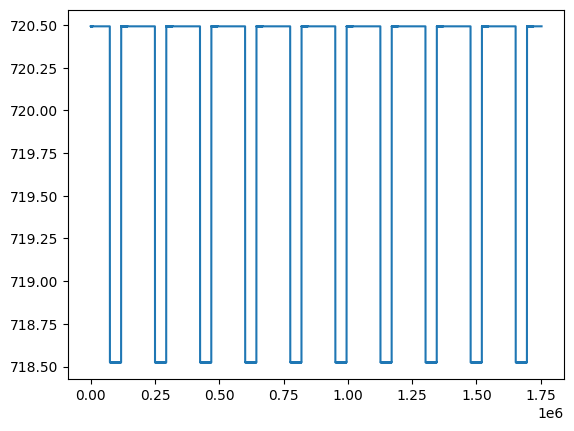

In [46]:
plt.plot(range(len(t)-1), np.diff(t.reshape(-1,)) * 86400 * 365.25) 

In [47]:
realistic_sphinputs = sphinputs[np.isin(sphinputs[:, 0], visible_times, assume_unique=True)]
realistic_sphinputs

array([[ 5.84030350e+10,  6.97609512e+10,  1.57076401e+00, ...,
        -2.72514260e-02, -1.46506427e-08,  7.00281954e-08],
       [ 5.84030357e+10,  6.97603896e+10,  1.57076403e+00, ...,
        -2.72518652e-02, -1.46624281e-08,  7.00673433e-08],
       [ 5.84030365e+10,  6.97598250e+10,  1.57076405e+00, ...,
        -2.72523090e-02, -1.46742187e-08,  7.01092923e-08],
       ...,
       [ 5.96509918e+10,  6.27981414e+10,  1.57078061e+00, ...,
        -3.36295014e-02, -7.42547821e-09, -6.66720852e-09],
       [ 5.96509926e+10,  6.27921813e+10,  1.57078058e+00, ...,
        -3.36358886e-02, -7.42374528e-09, -6.68060216e-09],
       [ 5.96509933e+10,  6.27862192e+10,  1.57078055e+00, ...,
        -3.36422758e-02, -7.42200090e-09, -6.69211919e-09]])

In [48]:
r = realistic_sphinputs[:, 1]
phi = realistic_sphinputs[:, 3]
vp = realistic_sphinputs[:, 6]
interp_data = np.stack((r, phi, vp), axis=1)
interp_data

array([[ 6.97609512e+10, -1.69727437e+00,  3.88900341e+04],
       [ 6.97603896e+10, -1.69687298e+00,  3.88903472e+04],
       [ 6.97598250e+10, -1.69647159e+00,  3.88906620e+04],
       ...,
       [ 6.27981414e+10, -8.07134027e-01,  4.32017687e+04],
       [ 6.27921813e+10, -8.06638658e-01,  4.32058693e+04],
       [ 6.27862192e+10, -8.06143195e-01,  4.32099721e+04]])

In [49]:
np.save('interp_data.npy', interp_data)

In [50]:
interp_data = np.load('interp_data.npy')
interp_data

array([[ 6.97609512e+10, -1.69727437e+00,  3.88900341e+04],
       [ 6.97603896e+10, -1.69687298e+00,  3.88903472e+04],
       [ 6.97598250e+10, -1.69647159e+00,  3.88906620e+04],
       ...,
       [ 6.27981414e+10, -8.07134027e-01,  4.32017687e+04],
       [ 6.27921813e+10, -8.06638658e-01,  4.32058693e+04],
       [ 6.27862192e+10, -8.06143195e-01,  4.32099721e+04]])

# GETTING ACCELERATIONS FOR GNN

In [51]:
visible_times, len(visible_times)

(array([5.84030350e+10, 5.84030357e+10, 5.84030365e+10, ...,
        5.96509918e+10, 5.96509926e+10, 5.96509933e+10]),
 500374)

### Observational (Realistic) Data, Rotated to be in a flat plane of motion

In [52]:
targets = sphinputs
targets

array([[ 5.83909841e+10,  4.75612734e+10,  1.57085148e+00, ...,
        -5.86282751e-02,  2.10771578e-09,  1.37462570e-08],
       [ 5.83909848e+10,  4.75570080e+10,  1.57085146e+00, ...,
        -5.86387693e-02,  2.11411213e-09,  1.37183261e-08],
       [ 5.83909855e+10,  4.75527476e+10,  1.57085145e+00, ...,
        -5.86492814e-02,  2.12058385e-09,  1.36741566e-08],
       ...,
       [ 5.96532859e+10,  4.60759974e+10,  1.57076675e+00, ...,
        -6.24689880e-02,  7.77071112e-09, -1.79796743e-08],
       [ 5.96532866e+10,  4.60769928e+10,  1.57076679e+00, ...,
        -6.24662868e-02,  7.77001646e-09, -1.80180136e-08],
       [ 5.96532873e+10,  4.60779948e+10,  1.57076683e+00, ...,
        -6.24635551e-02,  7.76930765e-09, -1.81021954e-08]])

### ginputs, inputs for GNN

In [53]:
sphfeats = targets
ginputs = sphfeats[np.isin(sphfeats[:, 0], visible_times, assume_unique=True)]
ginputs

array([[ 5.84030350e+10,  6.97609512e+10,  1.57076401e+00, ...,
        -2.72514260e-02, -1.46506427e-08,  7.00281954e-08],
       [ 5.84030357e+10,  6.97603896e+10,  1.57076403e+00, ...,
        -2.72518652e-02, -1.46624281e-08,  7.00673433e-08],
       [ 5.84030365e+10,  6.97598250e+10,  1.57076405e+00, ...,
        -2.72523090e-02, -1.46742187e-08,  7.01092923e-08],
       ...,
       [ 5.96509918e+10,  6.27981414e+10,  1.57078061e+00, ...,
        -3.36295014e-02, -7.42547821e-09, -6.66720852e-09],
       [ 5.96509926e+10,  6.27921813e+10,  1.57078058e+00, ...,
        -3.36358886e-02, -7.42374528e-09, -6.68060216e-09],
       [ 5.96509933e+10,  6.27862192e+10,  1.57078055e+00, ...,
        -3.36422758e-02, -7.42200090e-09, -6.69211919e-09]])

In [54]:
np.save('ginputs.npy', ginputs)
ginputs

array([[ 5.84030350e+10,  6.97609512e+10,  1.57076401e+00, ...,
        -2.72514260e-02, -1.46506427e-08,  7.00281954e-08],
       [ 5.84030357e+10,  6.97603896e+10,  1.57076403e+00, ...,
        -2.72518652e-02, -1.46624281e-08,  7.00673433e-08],
       [ 5.84030365e+10,  6.97598250e+10,  1.57076405e+00, ...,
        -2.72523090e-02, -1.46742187e-08,  7.01092923e-08],
       ...,
       [ 5.96509918e+10,  6.27981414e+10,  1.57078061e+00, ...,
        -3.36295014e-02, -7.42547821e-09, -6.66720852e-09],
       [ 5.96509926e+10,  6.27921813e+10,  1.57078058e+00, ...,
        -3.36358886e-02, -7.42374528e-09, -6.68060216e-09],
       [ 5.96509933e+10,  6.27862192e+10,  1.57078055e+00, ...,
        -3.36422758e-02, -7.42200090e-09, -6.69211919e-09]])

In [1]:
ginputs = np.load('ginputs.npy')
ginputs

array([[ 5.84030350e+10,  6.97609512e+10,  1.57076401e+00, ...,
        -2.72514260e-02, -1.46506427e-08,  7.00281954e-08],
       [ 5.84030357e+10,  6.97603896e+10,  1.57076403e+00, ...,
        -2.72518652e-02, -1.46624281e-08,  7.00673433e-08],
       [ 5.84030365e+10,  6.97598250e+10,  1.57076405e+00, ...,
        -2.72523090e-02, -1.46742187e-08,  7.01092923e-08],
       ...,
       [ 5.96509918e+10,  6.27981414e+10,  1.57078061e+00, ...,
        -3.36295014e-02, -7.42547821e-09, -6.66720852e-09],
       [ 5.96509926e+10,  6.27921813e+10,  1.57078058e+00, ...,
        -3.36358886e-02, -7.42374528e-09, -6.68060216e-09],
       [ 5.96509933e+10,  6.27862192e+10,  1.57078055e+00, ...,
        -3.36422758e-02, -7.42200090e-09, -6.69211919e-09]])

### GNN Targets for evaluation accuracy of GNN

In [56]:
gnn_targets = targets
np.save('gnn_targets.npy', gnn_targets)
gnn_targets

array([[ 5.83909841e+10,  4.75612734e+10,  1.57085148e+00, ...,
        -5.86282751e-02,  2.10771578e-09,  1.37462570e-08],
       [ 5.83909848e+10,  4.75570080e+10,  1.57085146e+00, ...,
        -5.86387693e-02,  2.11411213e-09,  1.37183261e-08],
       [ 5.83909855e+10,  4.75527476e+10,  1.57085145e+00, ...,
        -5.86492814e-02,  2.12058385e-09,  1.36741566e-08],
       ...,
       [ 5.96532859e+10,  4.60759974e+10,  1.57076675e+00, ...,
        -6.24689880e-02,  7.77071112e-09, -1.79796743e-08],
       [ 5.96532866e+10,  4.60769928e+10,  1.57076679e+00, ...,
        -6.24662868e-02,  7.77001646e-09, -1.80180136e-08],
       [ 5.96532873e+10,  4.60779948e+10,  1.57076683e+00, ...,
        -6.24635551e-02,  7.76930765e-09, -1.81021954e-08]])

# SCRAP

In [64]:
import sympy as sp
expr = sp.sympify("v_phi**2/((-34689470.0)*1598.5605*v_phi)")
simplified_expr = sp.simplify(expr)
print(simplified_expr)

-1.80332190443255e-11*v_phi


In [59]:
import matplotlib as mpl
mpl.rcParams['lines.markersize']

6.0

In [50]:
variable_names = ['r', 'theta', 'phi', 'v_r', 'v_theta', 'v_phi']
sorted(['v_phi', 'theta', 'r', 'v_r'], key=lambda s: variable_names.index(str(s)))

['r', 'theta', 'v_r', 'v_phi']

In [55]:
column_dicts = dict(zip(variable_names, [variable_names.index(str(s)) for s in variable_names]))
column_dicts['r']

0

In [52]:
for s in variable_names:
    print(variable_names.index(str(s)))

0
1
2
3
4
5


In [20]:
gnn_targets = np.load('gnn_targets.npy')
np.std(gnn_targets, axis=0)

array([3.64394646e+08, 8.33234957e+09, 2.33085760e-05, 1.80410771e+00,
       6.99602317e+03, 1.10682233e+00, 6.92523409e+03, 1.21031263e-02,
       7.79566195e-09, 3.30275553e-08])

In [63]:
test_r = gnn_targets[0, 1] / 1000
test_vp = gnn_targets[0, 6] / 1000
test_a = gnn_targets[0, 7] / 1000
test_r, test_vp, test_a

(47561273.38575632, 57.042210501896676, -5.862827506524725e-05)

In [61]:
-132712e6 / test_r ** 2

-5.8668265230253174e-05

In [6]:
132712e+6 * 1000**3/ 5e10**2

0.0530848

In [10]:
G = 6.6743e-11
M_sun = 1.98847e30
AU = 1.496e11
c = 3.0e8
M_m = 0.33010e24
R_m = 2.4405e6

kappa = (G * M_sun**(-1) * R_m**2 * (c**2))
print(kappa)


1.799230538882533e-11


In [76]:
test_ts = gnn_targets[:, 1].reshape(-1, 1)
np.shape(test_ts)
test_ts[:, :]

array([[4.75612734e+10],
       [4.75570080e+10],
       [4.75527476e+10],
       ...,
       [4.60759974e+10],
       [4.60769928e+10],
       [4.60779948e+10]])

In [68]:
50.949 * -2.6043e18, -3.2037e9*4.1418e10

(-1.326864807e+20, -1.326908466e+20)

In [64]:
-test_a*1000 * (test_r*1000)**2

1.3262153925844856e+20

In [116]:
import dask.dataframe as dd
import numpy as np

data = dd.read_csv('horizons.csv', dtype=np.float64, blocksize=300e6)
df = data.loc[200000:400000-1, :].compute()
df.iloc[:, 1:] = df.iloc[:, 1:] * 1000
df.iloc[:, 0] = df.iloc[:, 0] * 24 * 3600
df['RG'] = np.sqrt(df['X'] ** 2 + df['Y'] ** 2 + df['Z'] ** 2)

In [122]:
from scipy.interpolate import UnivariateSpline

t = df.iloc[:, 0].to_numpy()
x, y, z = df.iloc[:, 1].to_numpy(), df.iloc[:, 2].to_numpy(), df.iloc[:, 3].to_numpy()
vx, vy, vz = df.iloc[:, 4].to_numpy(), df.iloc[:, 5].to_numpy(), df.iloc[:, 6].to_numpy()

splinex = UnivariateSpline(t, vx, k=3, s=0)
spliney = UnivariateSpline(t, vy, k=3, s=0)
splinez = UnivariateSpline(t, vz, k=3, s=0)

ax = splinex.derivative(n=1)(t)
ay = spliney.derivative(n=1)(t)
az = splinez.derivative(n=1)(t)

ax, ay, az

(array([-0.04985251, -0.04985548, -0.04985841, ..., -0.04371006,
        -0.04372607, -0.04374207]),
 array([-0.0134213 , -0.01345788, -0.01349448, ...,  0.00415322,
         0.00412879,  0.00410435]),
 array([-0.00197487, -0.0019941 , -0.00201333, ...,  0.00676833,
         0.00675695,  0.00674557]))

In [124]:
rg = df['RG'].to_numpy()
ar = (x*ax + y*ay + z*az)/rg
ar

array([-0.05166531, -0.05167843, -0.05169154, ..., -0.04442554,
       -0.04443729, -0.04444904])

In [125]:
np.min(ar), np.max(ar), np.median(ar)

(-0.0627118660171221, -0.027227117806946057, -0.036448700395266695)

In [60]:
ar[:10]*1000

array([0.00974468, 0.00975256, 0.00976044, 0.00976832, 0.00977619,
       0.00978405, 0.00979191, 0.00979976, 0.0098076 , 0.00981544])

In [61]:
rg[:10]

array([47561273.38575633, 47557007.95485939, 47552747.57969094,
       47548492.2643358 , 47544242.0128759 , 47539996.82939029,
       47535756.71795504, 47531521.68264332, 47527291.72752535,
       47523066.85666842])

In [38]:
132712e6 / (rg[0]**2)

5.866826523025315e-05

In [43]:
import dask.dataframe as dd
import numpy as np
from dask.diagnostics import ProgressBar

df = dd.read_csv('horizons.csv', dtype=np.float64, blocksize=300e6)
df['RG'] = np.sqrt(df['X'] ** 2 + df['Y'] ** 2 + df['Z'] ** 2)
nrows = data.shape[0].compute()
data = df[['JDTDB', 'RG']]
data_trunc = data.head(int((30 / 60) * nrows), compute=False)
with ProgressBar():
    data_trunc.compute().to_csv('morbit_data.csv', index=False)

[########################################] | 100% Completed | 2.29 ss


In [ ]:
import numpy as np
np.load('ginputs.npy')

In [ ]:
from utils import *

In [ ]:
print_block("WITHOUT NUMPY")

In [ ]:
new_parameter("SE_REDUCTION", 2, hopt_type='categorical', hopt_range=[2, 4, 8, 16])

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('horizons.csv')
data

In [ ]:
data['RG'] = np.sqrt(data['X']**2 + data['Y']**2 + data['Z']**2)
data['RG']

In [ ]:
len(RG)

In [ ]:
yr = 1870
print(f"{yr:0>4}")

In [ ]:
(
        43 *   # as/cy
        1/100 *    # 1cy/100yr
        1/3600 *   # 1deg/3600as
        np.pi/180 *    # pi rad / 180 deg
        0.2408467/1 *  # yr/orbit
        1   # rad/orbit
 ) * 100 # percent error per orbit from newtonian physics


In [ ]:
from data_construction import *

In [ ]:
feats = load_np('ginputs.npy', nrows=config.NUM_SAMPLES, step=config.STEP)
feats

In [ ]:
r = feats[0, 0]
a = feats[0, 6]
r, a

In [ ]:
-1.327e20/(r**2)

In [ ]:
x = feats[..., :3]
x[..., 1] = np.random.uniform(0, np.pi, size=x.shape[0])
x[..., 2] = np.random.uniform(-np.pi, np.pi, size=x.shape[0])
x

In [ ]:
v = sixth_order_central_difference(x, 144)
v

In [ ]:
a = sixth_order_central_difference(v, 144)
a

In [ ]:
-1.327e20/(r**2)

In [ ]:
v = sixth_order_central_difference(x, 0.000001)
v

In [ ]:
a = sixth_order_central_difference(v, 0.1)
a

In [ ]:
from scipy.spatial.transform import Rotation as R

In [ ]:
rot = R.random().as_matrix()
rot

In [ ]:
r = feats[:, :3]
v = feats[:, 3:6]
rr = apply_rotation(r, rot)
rv = apply_rotation(v, rot)

In [ ]:
np.einsum('ij,ji->j', rot, r)

In [ ]:
rr

In [ ]:
rv

In [ ]:
acc = sixth_order_central_difference(rv, 720)
acc

In [ ]:
tot = np.empty((rr.shape[0], 9), dtype=np.float64)
tot[:, :6] = cart_to_sph(rr, rv)
tot[:, 6:] = cart_to_sph(rr, acc)[:, 3:]
tot

In [ ]:
rfs = randomly_rotate(feats)
rfs

In [ ]:
rv = rfs[:, 3:6]
acc = sixth_order_central_difference(rv, 720)
acc

In [ ]:
from scipy.spatial.transform import Rotation as R

R.random().as_matrix()

In [ ]:
d = {
'steps_per_epoch': 45,
'pct_start': 645,
'final_div_factor': 13245,
'three_phase': 41,
}

newd = {k: v for k,v in d.items()}
newd

In [ ]:
from importlib import reload
import utils
import config

reload(utils)

In [ ]:
model = config.retrieve('model').load_from_checkpoint('testing.ckpt')

In [ ]:
X, y = utils.gnn_test(model, ntrials=250000, suppress=True, SR=True)

In [ ]:
X

In [ ]:
y

In [ ]:
d = {}
d.update(test=1, red=1)
d

In [ ]:
alpha = -0.0001
if not 0 <= alpha <= 1:
    print('y')
    print(1-alpha)

In [ ]:
1/(0.5+1e-1)

In [ ]:
gnn_targets = np.load('gnn_targets.npy')
gnn_targets

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from utils import *
ginputs = np.load('ginputs.npy')
ginputs

In [ ]:
plt.plot(range(len(ginputs[:, 0])), ginputs[:, 6])

In [ ]:
plt.plot(range(len(gnn_targets[:, 0])), gnn_targets[:, 6])

In [ ]:
X = ginputs[:250, -3:]
scaler = StandardScaler()
g_scaled = scaler.fit_transform(ginputs)

padded = np.hstack((np.zeros((X.shape[0], 6)), X))
scaled = scaler.transform(padded)[:, -3:]
out_padded = np.hstack((np.zeros((X.shape[0], 6)), scaled))
out = scaler.inverse_transform(out_padded)[:, -3:]

calc_mae(out, X)

In [ ]:
attr

In [ ]:
import numpy as np
ls = []
x=np.zeros((4,))
for i in range(6):
    ls.append(x)
ls = np.array(ls)
ls.shape

In [ ]:

from data_construction import *

In [ ]:
scaler = joblib.load(config.SCALER_FILE)
scaler['input_scaler']

In [ ]:
print("After scaling mins:",np.min(np.abs(g_scaled), axis=0))

In [ ]:
print("After scaling mins:",np.min(g_scaled, axis=0))
print("After scaling maxs:",np.max(g_scaled, axis=0))

In [ ]:
print("Before scaling mins:",np.min(ginputs, axis=0))
print("Before scaling maxs:",np.max(ginputs, axis=0))

In [ ]:
np.min(ginputs[:, -2]), np.max(ginputs[:, -2])

In [ ]:
plt.plot(range(len(ginputs[:, 0])), ginputs[:, -1])
plt.plot(range(len(ginputs[:, 0])), ginputs[:, -2])

In [ ]:
['minimize']*3

In [ ]:
x = torch.tensor(ginputs[:, :3])
y = torch.tensor(ginputs[:, 4].reshape(-1, 1))
z = torch.tensor(ginputs[:, 5].reshape(-1, 1))

a = torch.cat([x, y, z], dim=1)

In [ ]:
from utils import print_block
print_block("test", "testing")

In [ ]:
import numpy as np
type(2**round(np.log2(np.sqrt(1250000))))

In [ ]:
import numpy as np

In [ ]:
1250000/1024

In [ ]:
import config
from importlib import reload
reload(config)
@config.register('gnn')
def test():
    pass

In [ ]:
torch.exp(torch.tensor(24.5))

In [ ]:
.75 * len(gnn_targets)

In [ ]:
plt.plot(range(len(interp_data)), interp_data[:, 1])

In [ ]:
interp_data.shape

In [ ]:
(np.array([4, 5]).reshape(1, -1)).shape

In [ ]:
y = 1/interp_data[:, 0]
y

In [ ]:
len((0,1))

In [ ]:
np.min(y), np.max(y)

In [ ]:
dy = sixth_order_central_difference(y, 700)
dy

In [ ]:
np.mean(dy)

In [ ]:
np.min(dy), np.max(dy)

In [ ]:
len(dy), len(interp_data)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(interp_data)), dy)

In [ ]:
np.mean(1/sphinputs[:, 1])

In [ ]:
sphinputs = load_np('sphinputs.npy')
sphinputs

In [ ]:
L_t = mean_L_vector(spherical=sphinputs[:, 1:], return_list=True)
plt.plot(sphinputs[:, 0], L_t)

In [ ]:
L_t

In [ ]:
slc = slice(10000000, 20000000)

In [ ]:
phi_data = sphinputs[slc, 3]
R_data = sphinputs[slc, 1]  
p = 55463207358.96916
e = 0.2055194223830019

In [ ]:
from lmfit import Model, Parameters
import numpy as np

def orbital_model(phi, p_intercept, p_slope, e_intercept, e_slope, alpha):
    p = p_intercept + p_slope * phi
    e = e_intercept + e_slope * phi
    return p / (1 - e * np.cos(alpha * phi))

model = Model(orbital_model)

params = Parameters()
params.add('p_intercept', value=55463207358.96916, min=55463207358.96916 - 5e9, max=55463207358.96916 + 5e9)
params.add('p_slope', value=3e9)
params.add('e_intercept', value=0.2055194223830019, min=0.19, max=0.21)
params.add('e_slope', value=0.00001)
params.add('alpha', value=0.9999, min=0.99, max=1.0)

result = model.fit(R_data, params, phi=phi_data)

print(result.fit_report())

In [ ]:
from deap import base, creator, tools, algorithms
import random

# Set up the DEAP framework for optimization
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0.99, 1.0)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalAlpha(individual):
    alpha = individual[0]
    return (float(loss_function(alpha, phi_data, R_data)),)

toolbox.register("evaluate", evalAlpha)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.01, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=50)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, verbose=False)

best_individual = tools.selBest(population, 1)[0]
best_alpha = best_individual[0]
print(f"Best alpha: {best_alpha}")

In [ ]:
jnp.cos(0.9999999134736005) - jnp.cos(0.99000002215574)

In [ ]:
alpha % (2*np.pi) / (2*np.pi)

In [ ]:
xp = 46.56 / (180 / np.pi * 3600 * 100 / 0.2408467)
xp

In [ ]:
actual_alpha = 1/ (xp / (2*np.pi) + 1)
actual_alpha

In [ ]:
2*np.pi/alpha_opt - 2* np.pi

In [ ]:
(2*np.pi*(1/alpha_opt -1)) 

In [ ]:
import jax.numpy as jnp
from jax import jit

@jit
def sixth_order_central_difference_variable_time(x, t):
    """
    Sixth order central difference with variable time steps.
    :param x: jnp.array of shape (N,): 1D data array.
    :param t: jnp.array of shape (N,): 1D time array.
    :return: jnp.array of shape (N,): dxdt to sixth order accuracy.
    """
    N = x.shape[0]
    
    if N < 7:
        raise ValueError("Input array must have at least 7 points for sixth-order central difference.")
    
    dxdt = jnp.zeros_like(x)

    # Calculate forward and backward time differences
    dt_forward = t[1:] - t[:-1]  # Forward difference (length N-1)
    dt_backward = jnp.concatenate([jnp.array([dt_forward[0]]), dt_forward[:-1]])  # Backward difference (shifted forward difference)

    # Central difference for interior points (3 to N-4)
    central_coeff = 1 / (60 * (dt_forward[3:N-3] + dt_backward[3:N-3]))
    stencil = (
        -x[0:N-6] / dt_backward[0:N-6] +
        9 * x[1:N-5] / dt_backward[1:N-5] -
        45 * x[2:N-4] / dt_backward[2:N-4] +
        45 * x[4:N-2] / dt_forward[3:N-3] -
        9 * x[5:N-1] / dt_forward[4:N-2] +
        x[6:N] / dt_forward[5:N-1]
    )
    dxdt = dxdt.at[3:N-3].set(central_coeff * stencil)

    # Boundary stencils for the first three points
    forward_coeff_first = 1 / (60 * dt_forward[:7])
    stencil_first = jnp.array([-147, 360, -450, 400, -225, 72, -10])
    dxdt = dxdt.at[0].set(jnp.dot(forward_coeff_first, stencil_first * x[:7]))

    forward_coeff_second = 1 / (60 * dt_forward[1:7])
    stencil_second = jnp.array([-10, -77, 150, -100, 50, -15])
    dxdt = dxdt.at[1].set(jnp.dot(forward_coeff_second, stencil_second * x[1:7]))

    forward_coeff_third = 1 / (60 * dt_forward[2:8])
    stencil_third = jnp.array([2, -24, -35, 80, -30, 8])
    dxdt = dxdt.at[2].set(jnp.dot(forward_coeff_third, stencil_third * x[2:8]))

    # Boundary stencils for the last three points
    backward_coeff_third_last = 1 / (60 * dt_backward[-7:])
    stencil_third_last = jnp.array([1, -8, 30, -80, 35, 24, -2])
    dxdt = dxdt.at[-3].set(jnp.dot(backward_coeff_third_last, stencil_third_last * x[-7:]))

    backward_coeff_second_last = 1 / (60 * dt_backward[-6:])
    stencil_second_last = jnp.array([-2, 15, -50, 100, -150, 77])
    dxdt = dxdt.at[-2].set(jnp.dot(backward_coeff_second_last, stencil_second_last * x[-6:]))

    backward_coeff_last = 1 / (60 * dt_backward[-7:])
    stencil_last = jnp.array([10, -72, 225, -400, 450, -360, 147])
    dxdt = dxdt.at[-1].set(jnp.dot(backward_coeff_last, stencil_last * x[-7:]))

    return dxdt

In [ ]:
dts = jnp.diff(t, axis=0)
dt = jnp.mean(dts).item()
dt

In [ ]:
t = sphinputs[:, 0]
y = jnp.sin(t)
ay = jnp.cos(t)
dydt = sixth_order_central_difference(y, dt)
ddydt = sixth_order_central_difference_variable_time(y, t)

print(f"mape for dt: {calc_mape(dydt, ay)}")
print(f"mape for  t: {calc_mape(ddydt, ay)}")

In [ ]:
@jit
def theta_variance(new_z_axis, positions):
    """
    Calculates the variance in theta after rotating the current z axis to new z axis
    :param new_z_axis: jnp.array of shape (3,)
    :param positions: jnp.array of shape (~, 3)
    :return: jnp.array of shape (~,)
    """
    R = alignment_matrix(jnp.array([0, 0, 1]), new_z_axis)
    rotated_positions = apply_rotation(positions, R)
    x, y, z = rotated_positions[:, 0], rotated_positions[:, 1], rotated_positions[:, 2]
    r = jnp.sqrt(x**2 + y**2 + z**2)
    theta = jnp.arccos(z / r)
    return jnp.var(theta)


def minimize_theta_variance(positions):
    """
    Finds optimal z axis by minimizing theta variance using BFGS
    :param positions: jnp.array of shape (~, 3)
    :return: jnp.array of shape (3,)
    """
    initial_guess = jnp.array([-0.09, 0.08, 1])  # close to current z axis
    result = minimize(lambda vec: theta_variance(vec, positions), initial_guess, method='BFGS')
    return result.x

In [ ]:
r = sph[:, 0]
rbar=jnp.mean(r)
y = 1/rbar
L_t = mean_L_vector(spherical=sph, return_list=True)
F_r = 2e+22
m = 0.3301e24

In [ ]:
force_terms = calculate_force(r, v)
force_terms

In [ ]:
def calculate_force(r):
    """
    Newton force
    :param r: array-like, radius in m
    :return: Radial force component
    """
    # Define constants
    G = 6.6743e-11  # Gravitational constant in m^3 kg^-1 s^-2
    M_s = 1.988409870698051e30  # Mass of sun in kg
    m = 0.3301e24  # Mass of mercury in kg

    return -G * M_s * m / (r ** 2)

In [ ]:
def radial_ode(y, phi, xp, x_fp, v_fp, model):
    m = 0.33010e24  # kg, Mercury fact sheet: NASA
    M_s = M_sun.value   # kg
    y1, y2 = y
    
    r = 1 / y1
    v_phi = model
    
    pos = jnp.array([r, 0, 0])
    radial_force = calculate_force(M_s=M_s, m=m, x=pos, v=vel)[0]
    L = jnp.cross(pos, vel)
    L_mag = jnp.linalg.norm(L)
    dy2dphi = - radial_force / (m * y1**2 * L_mag**2) - y1
    
    return jnp.array([y2, dy2dphi])

@jit
def solve_eom(x, v, model, rtol=None, atol=None):
    phi = jnp.unwrap(x[:, 1])
    
    y0 = jnp.array([1 / jnp.sqrt(x[4, 0]**2 + x[4, 2]**2), 2.75e-12])
    
    R_vals = jnp.sqrt(x[:, 0]**2 + x[:, 2]**2)
    x_fp = x[:, 2]
    v_fp = v
    
    R = odeint(lambda y, phi: radial_ode(y, phi, R_vals, x_fp, v_fp, model), y0, phi, rtol=1e-9, atol=7.785e-9)
    
    return R

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import jax.numpy as jnp

R_t = jnp.sqrt(x_cyl[:, 0]**2 + x_cyl[:, 2]**2)

# Objective function for hyperopt
def objective(params):
    rtol, atol = params['rtol'], params['atol']
    
    R = solve_eom(x_cyl, v_cyl, rtol, atol)
    R_g = 1 / R[:, 0]
    
    # Calculate MAPE as the objective to minimize
    mape = calc_mape(R_g, R_t).item()
    
    return {'loss': mape, 'status': STATUS_OK}

# Define the search space
space = {
    'rtol': hp.loguniform('rtol', -20, 10),  # rtol in the range of 1e-20 to 1e-1
    'atol': hp.loguniform('atol', -20, 10)  # atol in the range of 1e-20 to 1e-1
}

# Use hyperopt to find the best parameters
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=300,  # Number of iterations
            trials=trials)

print("Best parameters found:", best)